In [1]:
from tensorflow.keras.models import load_model
from joblib import load

cnn_model = load_model('cnn_model.keras')

In [3]:
import numpy as np

# Load data from NPZ file
data = np.load('test_data.npz')

images = data['images']
features = data['features']
labels = data['labels']
classes = data['classes']

print(f"Images Shape: {images.shape}")
print(f"Features Shape: {features.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Classes: {classes}")

# Print number of unique values in each class
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(classes, counts):
    print(f"Class '{label}': {count} samples")

print("\nTotal samples:", len(labels))


Images Shape: (1100, 224, 224)
Features Shape: (1100, 8)
Labels Shape: (1100,)
Classes: ['gaussian' 'lognormal' 'poisson' 'rayleigh' 'saltpepper']
Class 'gaussian': 200 samples
Class 'lognormal': 250 samples
Class 'poisson': 200 samples
Class 'rayleigh': 250 samples
Class 'saltpepper': 200 samples

Total samples: 1100


In [4]:
probabilities_cnn = cnn_model.predict([images,features])


35/35 [==============================] - 7s 189ms/step


Accuracy: 0.89


AttributeError: module 'matplotlib' has no attribute 'title'

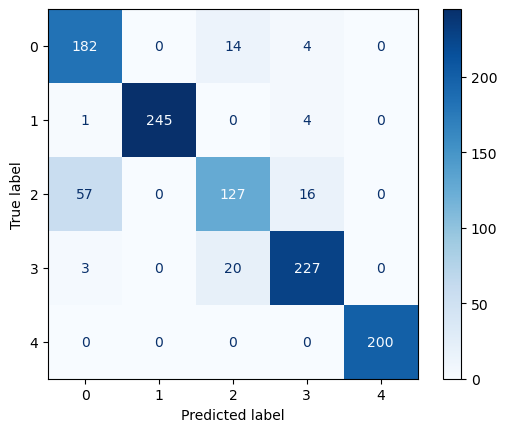

In [5]:
probabilities_cnn_array = np.array(probabilities_cnn)
predicted_classes = np.argmax(probabilities_cnn, axis=1)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib as plt


# Calculate accuracy
accuracy = accuracy_score(labels, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
cm = confusion_matrix(labels, predicted_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()